# Term Deposit Marketing Campaign Analysis

The aim of the marketing campaign was to get customers to subscribe to a bank term deposit product. Whether they did this or not is variable ‘y’ in the data set. The bank in question is considering how to optimise this campaign in future.

What would your recommendations to the marketing manager be?

________

### Step 1: Import Modules & Data

#### Step 1a: Import modules, read tab delimited file and review dataframe

In [1]:
# import pandas and numpy
import pandas as pd
import numpy as np

# import visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in tab delimited data file
inp = pd.read_csv('../Data/Bank_Marketing_Downloads.txt', header=0, sep='\t')

# review first five records of inp dataframe
inp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print('Dataframe contains', len(inp), 'rows and', len(inp.columns), 'columns')

Dataframe contains 45211 rows and 17 columns


*Observations:*
* Imported dataframe contains 45,211 rows and 17 columns

________

### Step 2: Data Exploration

#### Step 2a: Review data type and check for null values for each column

In [4]:
# print column data types and check for any columns with null values
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# check for duplicate records
print(inp.duplicated().value_counts())

False    45211
dtype: int64


*Observations:*
* Dataframe (inp) has 7 numerical and 10 categorical columns. 
* None of these columns have any null values. 
* There are no duplicates.

#### Step 2b: Explore numerical columns

In [6]:
# summary stats for numerical columns
inp.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


*Observations:*
* Mean age is approximately 41, with minimum age 18 and maximum age 95.
* Mean balance is $1362. However standard deviation is a high number suggesting balance amount is more spread out and indicating outliers in the dataset.
* 75% of customer were not contacted prior to this campaign. 
* Although duration of call might not be important ie: the longer the call, the more likely customer subscribes to term deposit. However, I am keen to investigate what was the mean call duration of customers who subscribed. More on this a little further down this notebook.


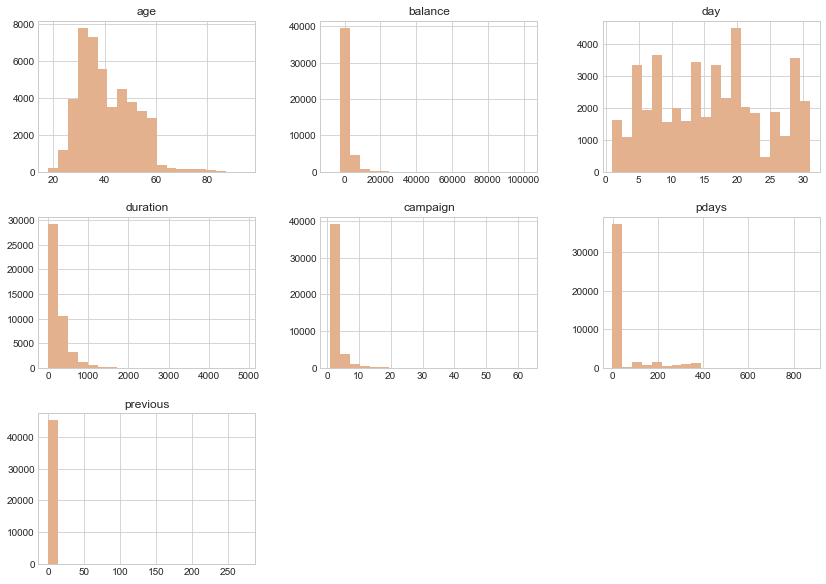

In [7]:
# distribution of each int columns
plt.style.use('seaborn-whitegrid')

inp.hist(bins=20, figsize=(14,10), color='#e3b18d')
plt.show()

*Observations:*
* We can see that numerical columns have outliers, especially 'campaign', 'pdays' and 'previous' columns), indicating outliers of possibly noisy data (incorrect value).

In [8]:
# let's take a closer look at 'campaign','pdays','previous'
inp[['balance','duration','campaign','pdays','previous']].describe()

,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,40.197828,0.580323
std,3044.765829,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Percentage of 'balance' in negative:
len (inp[inp['balance'] < 0] ) / len(inp) * 100

8.329831235761208

In [10]:
# Percentage of 'balance' above 10000:
len (inp[inp['balance'] > 10000] ) / len(inp) * 100

1.8336245603945942

*Observations:*
* 'balance' holds the average yearly balance, in euros (numeric).
* 8.4% of customers have negative average yearly balance.
* Because standard deviation of balance is such a high number, balance above 10000 are noise.
* Suggest to impute them with mean balance values while data cleaning.

In [11]:
# Percentage of 'duration' less than a minute:
len (inp[inp['duration'] < 60] ) / len(inp) * 100

10.305014266439583

In [12]:
# Percentage of 'duration' more than 30mins:
len (inp[inp['duration'] > 1800 ] ) / len(inp) * 100

0.23666806750569552

*Observations:*
* 'duration' holds last contact duration, in seconds (numeric) other attributes
* Numbers for 'duration' less than 60secs (1min) and more than 1800secs (30mins) are noise

In [13]:
# Percentage of 'campaign' values above 30:
len (inp[inp['campaign'] > 30] ) / len(inp) * 100

0.13049921479286014

*Observations:*
* 'campaign' holds the number of contacts performed during this campaign and for this client (numeric, includes last contact) 
* Numbers for 'campaign' above 30 are clearly noise
* Suggest to impute them with mean campaign values while data cleaning.

In [14]:
# Percentage of 'pdays' values < 0 ie: customer was not previously contacted:
len (inp[inp['pdays'] < 0] ) / len(inp) * 100

81.73674548229414

In [15]:
# Percentage of 'pdays' values above 365 (1 year):
len (inp[inp['pdays'] > 365] ) / len(inp) * 100

1.4222202561323571

*Observations:*
* 'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that:
* Almost 82% of customers weren't previously contacted.
* 1.42%% of values are above 365 (1 year). They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.

In [16]:
# Percentage of 'previous' values above 34:
len (inp[inp['previous'] > 34] ) / len(inp) * 100

0.024330362080024773

*Observations:*
* 'previous' holds the number of contacts performed before this campaign and for this client (numeric)
* Numbers for 'previous' above 34 are also really strange
* Suggest to impute them with mean values while data cleaning.

#### Step 2c: Explore categorical columns

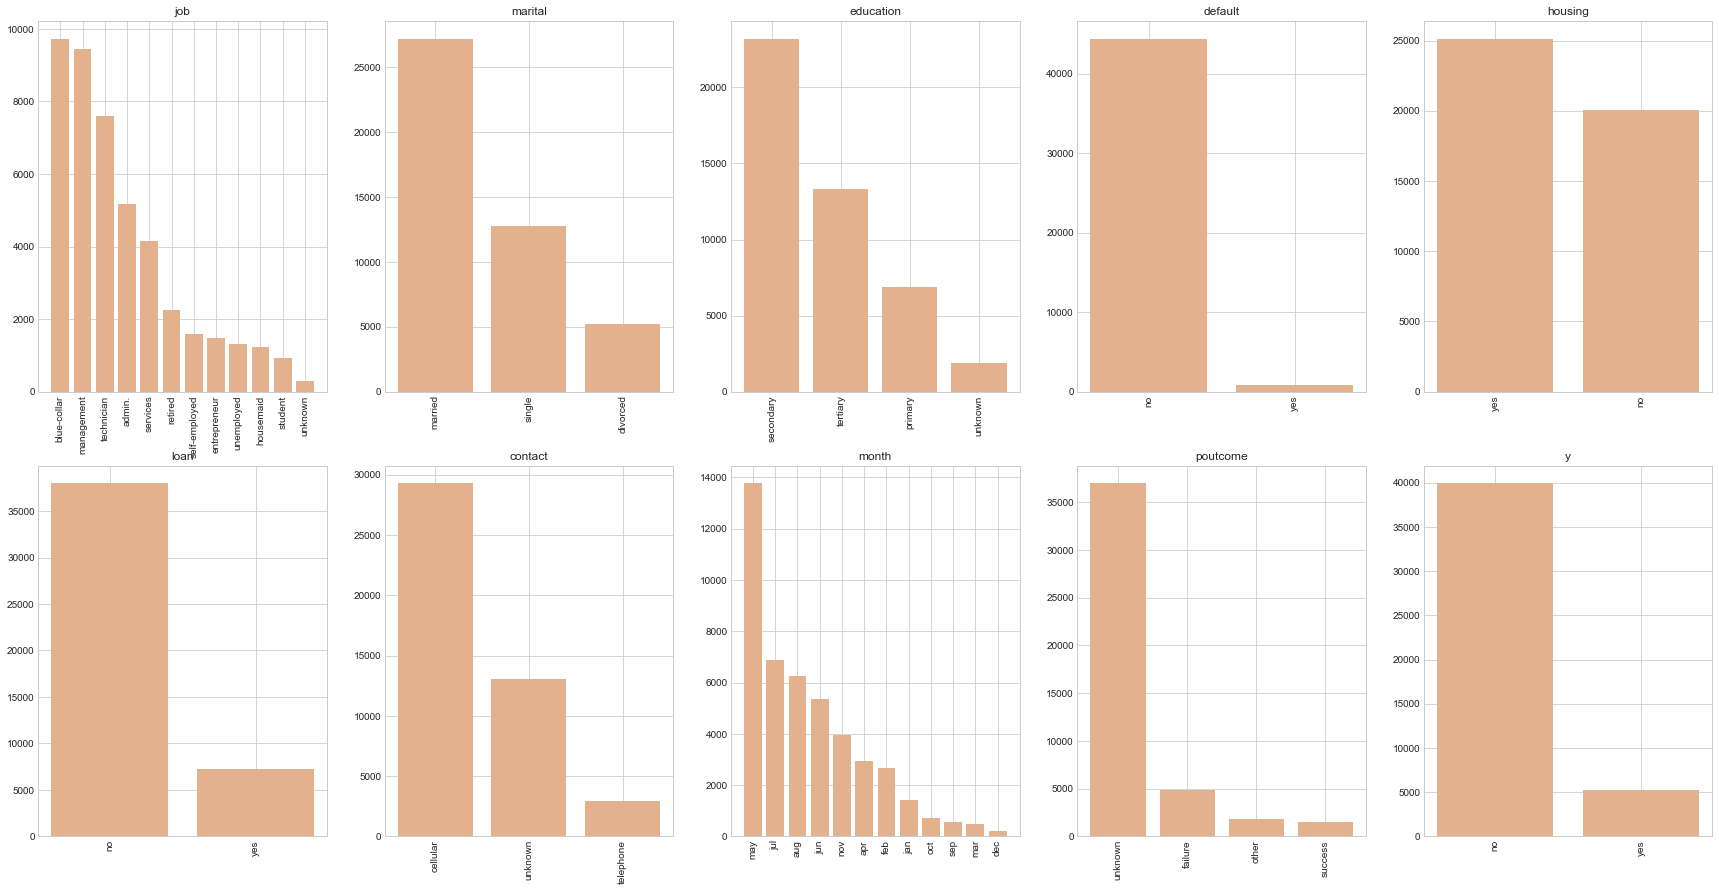

In [17]:
# distribution of categorical columns
colcatg = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome', 'y']
plt.style.use('seaborn-whitegrid')

fig, axs = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(30, 15))

counter = 0
for catg in colcatg:
    value_counts = inp[catg].value_counts()
    
    x = counter // 5
    y = counter % 5
    x_pos = np.arange(0, len(value_counts))
    
    axs[x, y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color ='#e3b18d')
    
    axs[x, y].set_title(catg)
    
    for tick in axs[x, y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

In [18]:
# closer look at variable y, taken up term deposit
total = len(inp['y'])
print(inp['y'].value_counts())
print(inp['y'].value_counts() / total)

no     39922
yes     5289
Name: y, dtype: int64
no     0.883015
yes    0.116985
Name: y, dtype: float64


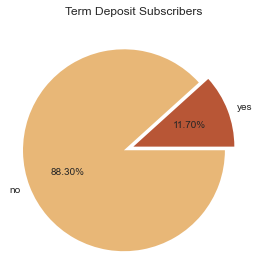

In [19]:
# visualise term deposit subscribers
sizes = list(inp['y'].value_counts().sort_values().values)
labels = list(inp['y'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%', colors = ('#b85636','#e8b777'))
plt.title('Term Deposit Subscribers')
plt.tight_layout()
plt.show()

*Observations:*
* Main call out from looking at distribution of categorical columns is the imbalance in 'y' column (subscribed to term deposit)
* 11.7% subscribed, while 88.3% did not subscribe to term deposit

#### Step 2d: Let's compare term deposit (column y) and compare to categorical columns

<AxesSubplot:title={'center':'Contact Month and Term Deposit Take Up'}>

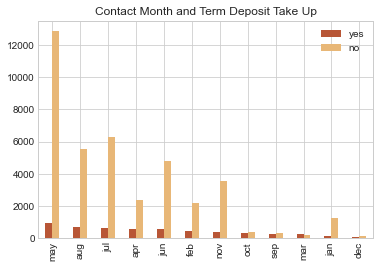

In [20]:
# a: month and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['month'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['month'].value_counts()

dfc.plot.bar(title = 'Contact Month and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Job and Term Deposit Take Up'}>

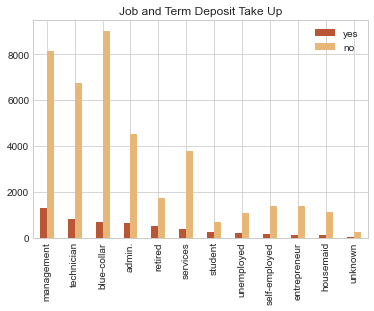

In [21]:
# b: job and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['job'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['job'].value_counts()

dfc.plot.bar(title = 'Job and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Education and Term Deposit Take Up'}>

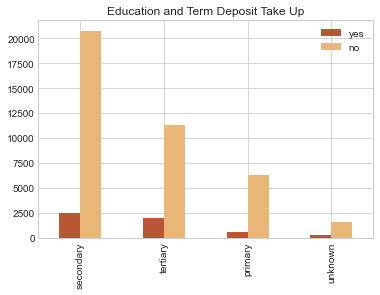

In [22]:
# c: education and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['education'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['education'].value_counts()

dfc.plot.bar(title = 'Education and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Marital Status and Term Deposit Take Up'}>

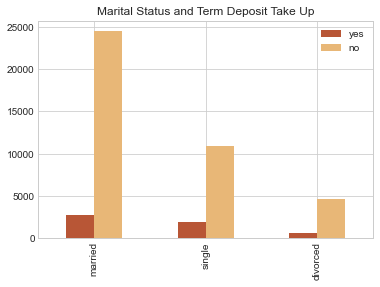

In [23]:
# d: marital status and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['marital'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['marital'].value_counts()

dfc.plot.bar(title = 'Marital Status and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Credit Default and Term Deposit Take Up'}>

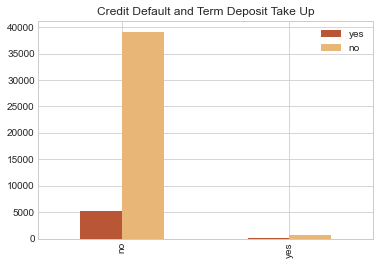

In [24]:
# e: credit default and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['default'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['default'].value_counts()

dfc.plot.bar(title = 'Credit Default and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Housing and Term Deposit Take Up'}>

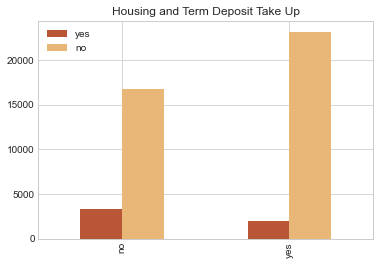

In [25]:
# f: housing loan and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['housing'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['housing'].value_counts()

dfc.plot.bar(title = 'Housing and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Personal Loan and Term Deposit Take Up'}>

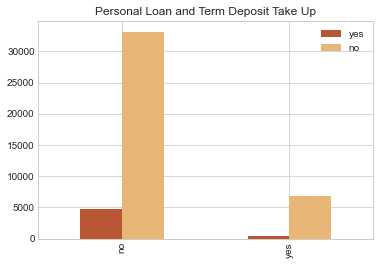

In [26]:
# g: personal loan and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['loan'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['loan'].value_counts()

dfc.plot.bar(title = 'Personal Loan and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Communication Type and Term Deposit Take Up'}>

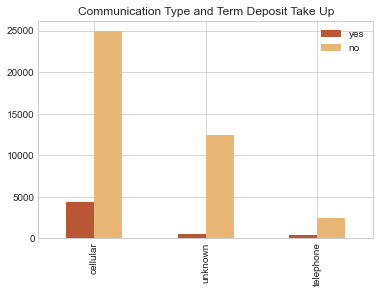

In [27]:
# h: communication type and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['contact'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['contact'].value_counts()

dfc.plot.bar(title = 'Communication Type and Term Deposit Take Up', color = ('#b85636','#e8b777'))

<AxesSubplot:title={'center':'Previous Campaign Outcome and Term Deposit Take Up'}>

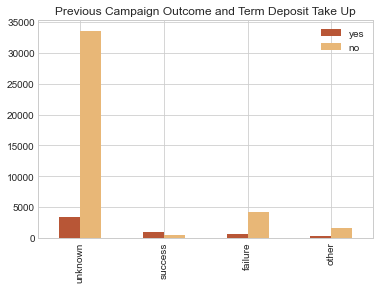

In [28]:
# i: poutcome and term deposit take up
dfc = pd.DataFrame()

dfc['yes'] = inp[inp['y'] == 'yes']['poutcome'].value_counts()
dfc['no'] = inp[inp['y'] == 'no']['poutcome'].value_counts()

dfc.plot.bar(title = 'Previous Campaign Outcome and Term Deposit Take Up', color = ('#b85636','#e8b777'))

*Observations:*
* Although the months of Mar, Sept, Oct and Dec had the least amount of leads, difference between yes/no is not significant as other months ie: higher subscription rate of total customers contacted in Mar, Sept, Oct and Dec.
* Customers in management are more likely to take term desposit.
* Those with tertiary education are more likely to take up term deposit
* Married customers are less likely to take up term deposit.
* Those who don't don't have a credit default, housing or personal loan are more likely to take up term deposit.
* Communication type cellular are more likely to take up term deposit.
* Customers where there was a positive outcome in previous campaign are highly more likely to take up term deposit. 

### Step 2e: Let's compare term deposit (column y) and compare to numerical columns

In [29]:
# a: balance and deposit
dfn = pd.DataFrame()
dfn['balance_yes'] = (inp[inp['y'] == 'yes'][['y','balance']].describe())['balance']
dfn['balance_no'] = (inp[inp['y'] == 'no'][['y','balance']].describe())['balance']

dfn

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and Deposit Stats'}>

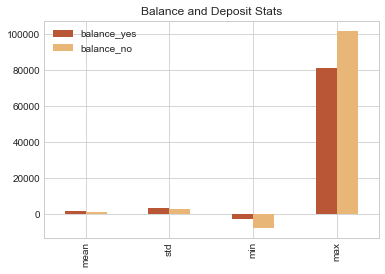

In [30]:
dfn.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and Deposit Stats', 
        color = ('#b85636','#e8b777'))

In [31]:
# b: age and deposit
dfn = pd.DataFrame()
dfn['age_yes'] = (inp[inp['y'] == 'yes'][['y','age']].describe())['age']
dfn['age_no'] = (inp[inp['y'] == 'no'][['y','age']].describe())['age']

dfn

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and Deposit Stats'}>

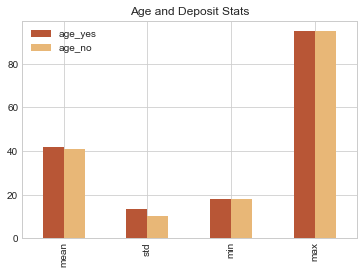

In [32]:
dfn.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Deposit Stats', 
        color = ('#b85636','#e8b777'))

In [33]:
# c: number of contacts performed during this campaign ('campaign') and deposit
dfn = pd.DataFrame()
dfn['campaign_yes'] = (inp[inp['y'] == 'yes'][['y','campaign']].describe())['campaign']
dfn['campaign_no'] = (inp[inp['y'] == 'no'][['y','campaign']].describe())['campaign']

dfn

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of Contacts this Campaign and Deposit Stats'}>

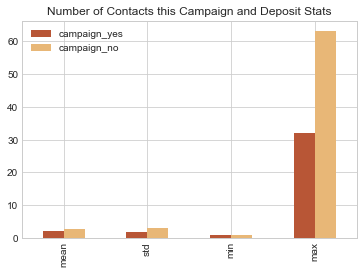

In [34]:
dfn.drop(['count', '25%', '50%', '75%']).plot.bar(
        title = 'Number of Contacts this Campaign and Deposit Stats', 
        color = ('#b85636','#e8b777'))

In [35]:
# d: number of contacts performed during previous campaign ('previous') and deposit
dfn = pd.DataFrame()
dfn['previous_yes'] = (inp[inp['y'] == 'yes'][['y','previous']].describe())['previous']
dfn['previous_no'] = (inp[inp['y'] == 'no'][['y','previous']].describe())['previous']

dfn

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of Contacts Previous Campaign and Deposit Stats'}>

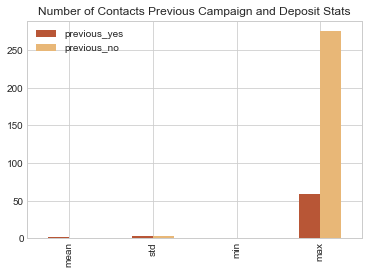

In [36]:
dfn.drop(['count', '25%', '50%', '75%']).plot.bar(
        title = 'Number of Contacts Previous Campaign and Deposit Stats', 
        color = ('#b85636','#e8b777'))

*Observations:*
* People who subscribed for term deposit tend to have greater balance and age values.
* People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

________

### Step 3: Data Cleaning

1. Convert columns with 'yes' and 'no' values to boolean columns;
2. Convert categorical columns into dummy variables.

In [37]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = inp.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['default', 'housing', 'loan', 'y']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = inp.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    # cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    cat_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['month'])

    #impute incorrect values and drop original columns
    # cleaned_df['balance_cleaned'] = df.apply(lambda row: get_correct_values(row, 'balance', 10000, cleaned_df),axis=1)
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 30, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [38]:
# clean the dataset
cleaned_df = clean_data(inp)
cleaned_df.head()

,age,balance,day,duration,pdays,default_bool,housing_bool,loan_bool,y_bool,job_blue-collar,...,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,58,2143,5,261,-1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1.0,0.0
1,44,29,5,151,-1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1.0,0.0
2,33,2,5,76,-1,0,1,1,0,0,...,1,0,0,0,1,0,0,1,1.0,0.0
3,47,1506,5,92,-1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1.0,0.0
4,33,1,5,198,-1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1.0,0.0


________

### Step 4: ML Classification Model (XGBoost)

Use cleaned datasets for prediction of campaign outcome with help of machine learning classification models. I will use XGBoost, which is one of the most common machine learning libraries for modelling.

Resulting model will also help me understand, which features have the greatest importance for the prediction of the results of the campaign.

In [39]:
#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [40]:
# Create X and y datasets for training the model and split into train and test datasets.
X = cleaned_df.drop(columns = 'y_bool')
y = cleaned_df[['y_bool']]

In [41]:
cleaned_df['y_bool'].value_counts()

0    39922
1     5289
Name: y_bool, dtype: int64

To work with imbalance data in y_bool column, I will use undersample, oversampling and Synthetic Minority Oversampling Technique (SMOTE)

##### Undersampling

In [42]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
rus = RandomUnderSampler(random_state=0)
X_Usampled, y_Usampled = rus.fit_resample(X, y)
y_Usampled.value_counts()

y_bool
0         5289
1         5289
dtype: int64

##### Oversampling

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler(random_state=0)
X_Osampled, y_Osampled = ros.fit_resample(X, y)
y_Osampled.value_counts()

y_bool
0         39922
1         39922
dtype: int64

##### Synthetic Minority Oversampling Technique (SMOTE)

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
y_SMOTE.value_counts()

y_bool
0         39922
1         39922
dtype: int64

##### Generate train and test data

In [48]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [49]:
# Without Sampling
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

# Undersampling
# X_train, X_test, y_train, y_test = train_test_split(X_Usampled, y_Usampled, test_size = TEST_SIZE, random_state=RAND_STATE)

# Oversampling
# X_train, X_test, y_train, y_test = train_test_split(X_Osampled, y_Osampled, test_size = TEST_SIZE, random_state=RAND_STATE)

# SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size = TEST_SIZE, random_state=RAND_STATE)

In [50]:
#train XGBoost model
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.947: test: 0.930


*Observations:*
* Without sampling: XGB accuracy score for train: 0.932: test: 0.901
* Undersampling: XGB accuracy score for train: 0.899: test: 0.830
* Oversampling: XGB accuracy score for train: 0.885: test: 0.872
* SMOTE: XGB accuracy score for train: 0.947: test: 0.930

SMOTE gives the highest accuracy score for train and test. 

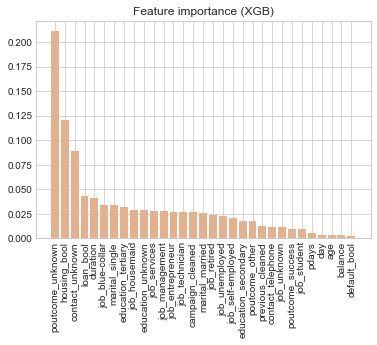

In [51]:
# get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

# plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'], color = '#e3b18d')
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importance (XGB)')

plt.show()

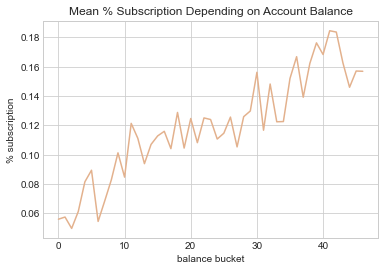

In [52]:
# Find out account balance, which marketing campaign should focus on:
df_new = cleaned_df.copy()

# introduce new column 'balance_buckets'
df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')

# group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_deposit = df_new.groupby(['balance_buckets'])['y_bool'].mean()

# plot
plt.plot(mean_deposit.index, mean_deposit.values, color = '#e3b18d')
plt.title('Mean % Subscription Depending on Account Balance')
plt.xlabel('balance bucket')
plt.ylabel('% subscription')
plt.show()

In [53]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1362

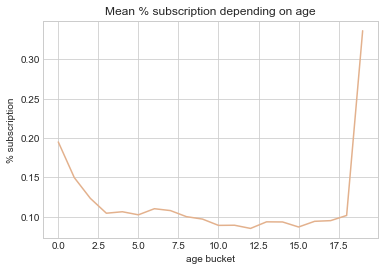

In [54]:
# introduce new column 'age_buckets'
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

# group by 'age_buckets' and find average campaign outcome per age bucket
mean_age = df_new.groupby(['age_buckets'])['y_bool'].mean()

# plot
plt.plot(mean_age.index, mean_age.values, color = '#e3b18d')
plt.title('Mean % subscription depending on age')
plt.xlabel('age bucket')
plt.ylabel('% subscription')
plt.show()

In [55]:
df_new[df_new['age_buckets'] == 3]['age'].max()

32

In [56]:
df_new[df_new['age_buckets'] == 17]['age'].min()

54

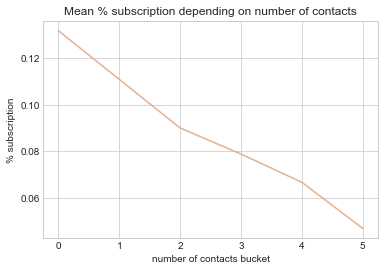

In [57]:
# Find out appropriate number of contacts with the customer during campaign:
# introduce new column 'campaign_buckets'
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

# group by 'campaign_buckets' and find average campaign outcome per campaign bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['y_bool'].mean()

# plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values, color = '#e3b18d')
plt.title('Mean % subscription depending on number of contacts')
plt.xlabel('number of contacts bucket')
plt.ylabel('% subscription')
plt.show()

In [58]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

*Observations:*
* From the diagram above we can conclude, that marketing campaigns should concentrate on customers with account balance greater than $1362.
* Subscrpition rate tends to be higher for customers below 32 years old or above 54 years old.
* From the plot above we see that average take up rate is below 50% if the number of contacts during the campaign exceeds 4.

________

### Recommendations

I recommend the following based on analysis conducted:

* Contact between 750-1000 customers per month. Months (Mar, Sep, Oct & Dec) when less customers were contacted resulted in higher subscription rate.
* Customers should have minimum $1350 balance in their account.
* Include customers who are under 35 or over 55 years of age.
* Customers who are not married.
* Maximum number of calls per customer each month should not exceed 4. 
* Customers should not have credit default or have housing/personal loans.
* Also prioritse calling customers who either have not been contacted previously or had a successful outcome from previous campaign.

________